In [8]:

import matplotlib.pyplot as plt 
import yfinance as yf


In [9]:
ma_1 = 30 # moving averages 
ma_2= 100
stock_data= yf.download("AAPL", start="2014-01-01")


[*********************100%%**********************]  1 of 1 completed


In [17]:
# get Adj Close from stock_data  
data = stock_data["Adj Close"].to_frame()
#calcualte moving averages 
data["ma_1"] = stock_data["Adj Close"].rolling(window=ma_1, min_periods=ma_1).mean()
data["ma_2"] =  stock_data["Adj Close"].rolling(window=ma_2, min_periods=ma_2).mean()



In [18]:
## Strategy here

In [19]:
longPositions=[]
shortPositions=[]
signal=0

for x in range(len(data)):
    if data['ma_1'].iloc[x] > data['ma_2'].iloc[x] and signal != 1:
        longPositions.append(data['Adj Close'].iloc[x])
        shortPositions.append(float('nan'))
        signal =1
        
    elif data['ma_1'].iloc[x] < data['ma_2'].iloc[x] and signal != -1:
        shortPositions.append(data['Adj Close'].iloc[x])
        longPositions.append(float('nan'))
        signal = -1
    else:
        longPositions.append(float('nan'))
        shortPositions.append(float('nan'))
    
        
data['long_pos'] = longPositions
data['short_pos'] = shortPositions
 


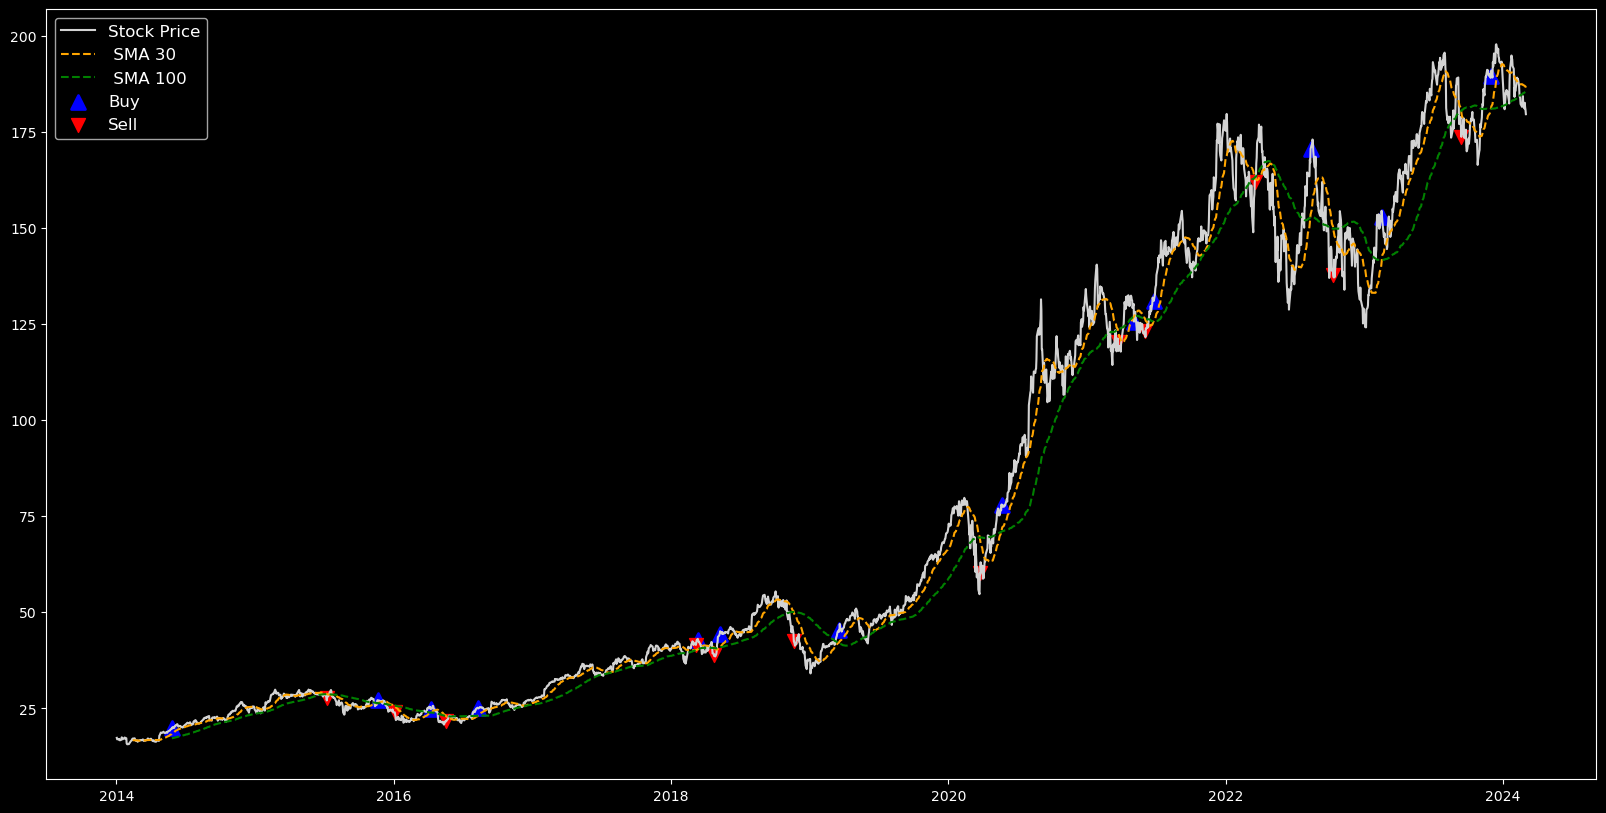

In [20]:
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
plt.plot(data["Adj Close"],label="Stock Price", color ="lightgrey")
plt.plot(data["ma_1"],label=f" SMA {ma_1}" , color ="orange", linestyle='--')
plt.plot(data["ma_2"],label=f" SMA {ma_2}" , color ="green", linestyle='--')


plt.scatter(data.index,data['long_pos'], s=100, c='blue', marker="^", label='Buy' , lw=2)
plt.scatter(data.index,data['short_pos'], s=100, c='red', marker='v', label='Sell')

plt.legend(loc="upper left",fontsize=12)
plt.show()